### Learn Pandas in 10 minutes

[https://pandas.pydata.org/pandas-docs/stable/10min.html](https://pandas.pydata.org/pandas-docs/stable/10min.html)

### Import pandas, numpy and matplotlib

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the dataset from this [address]('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

In [42]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
df = pd.read_csv(url, sep = '\t')

### Show the first 10 entries

In [6]:
df.head(10)

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...    $10.98   
6                                                NaN     $1.69   
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...    $11.75   
8  [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...     $9.25   
9  [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...     $9.25

### What is the number of observations in the dataset?

In [7]:
df = pd.read_csv(url, sep = '\t')
print(df.count()[1])

4622


### What is the number of columns in the dataset?

In [4]:
len(df.columns)

5

### Which was the most-ordered item and how many times it was ordered?

In [9]:
print(df.item_name.value_counts().index[0], df.item_name.value_counts()[0]+np.sum(df.quantity[df.item_name==df.item_name.value_counts().index[0]] - 1))

Chicken Bowl 761


### How many different items are sold?

In [8]:
print(df.item_name.value_counts().size)

50


### How many items were orderd in total?

In [11]:
print(np.sum(df.quantity))

4972


### Turn the item price into a float

In [12]:
print(pd.to_numeric(df['item_price'].map(lambda x: x.lstrip('$'))))

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
5       10.98
6        1.69
7       11.75
8        9.25
9        9.25
10       4.45
11       8.75
12       8.75
13      11.25
14       4.45
15       2.39
16       8.49
17       8.49
18       2.18
19       8.75
20       4.45
21       8.99
22       3.39
23      10.98
24       3.39
25       2.39
26       8.49
27       8.99
28       1.09
29       8.49
        ...  
4592    11.75
4593    11.75
4594    11.75
4595     8.75
4596     4.45
4597     1.25
4598     1.50
4599     8.75
4600     4.45
4601     1.25
4602     9.25
4603     9.25
4604     8.75
4605     4.45
4606     1.25
4607    11.75
4608    11.25
4609     1.25
4610    11.75
4611    11.25
4612     9.25
4613     2.15
4614     1.50
4615     8.75
4616     4.45
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64


### What is the price of each item?

In [14]:
print(df[['item_name', 'item_price']].drop_duplicates('item_name', keep = 'first'))



                                  item_name item_price
0              Chips and Fresh Tomato Salsa     $2.39 
1                                      Izze     $3.39 
2                          Nantucket Nectar     $3.39 
3     Chips and Tomatillo-Green Chili Salsa     $2.39 
4                              Chicken Bowl    $16.98 
6                             Side of Chips     $1.69 
7                             Steak Burrito    $11.75 
8                          Steak Soft Tacos     $9.25 
10                      Chips and Guacamole     $4.45 
11                     Chicken Crispy Tacos     $8.75 
12                       Chicken Soft Tacos     $8.75 
16                          Chicken Burrito     $8.49 
18                              Canned Soda     $2.18 
21                         Barbacoa Burrito     $8.99 
27                         Carnitas Burrito     $8.99 
33                            Carnitas Bowl     $8.99 
34                            Bottled Water     $1.09 
38    Chip

### How much was the revenue for the period in the dataset?

In [17]:
a1=pd.to_numeric(df['item_price'].map(lambda x: x.lstrip('$')))
a2=df['quantity']
print(np.sum(a1*a2))

39237.02


### How many orders were made in the period?

In [18]:
df["order_id"].value_counts()
df["order_id"].value_counts().shape

(1834,)

### What is the average revenue amount per order?

In [22]:
a1=pd.to_numeric(df['item_price'].map(lambda x: x.lstrip('$')))
a2=df['quantity']
print(np.sum(a1*a2)/np.max(df[['order_id']].drop_duplicates('order_id', keep = 'first').values))

21.39423118865867


### Merge the table ```dfa``` that contains order date and order id with ```df``` and plot daily revenue 

In [48]:
dfa = pd.DataFrame({"date": np.random.choice(pd.date_range(start="20170101", end="20170201"), size=1800),
                   "order_id": np.arange(1800)})
# inner_join
# outer_join
# right_join
# join
df["item_price_clear"] = df["item_price"].apply(lambda x: float(x[1:]))
k = dfa.merge(df)
k["revenue"] = k["item_price_clear"]*k["quantity"]
k.groupby("date").sum()["revenue"]


date
2017-01-01     89.35
2017-01-02     14.95
2017-01-03     11.48
2017-01-04    153.86
2017-01-05     67.86
2017-01-06     16.20
2017-01-07     36.00
2017-01-08     46.75
2017-01-09     16.20
2017-01-10     10.18
2017-01-11     60.85
2017-01-12     44.24
2017-01-13     12.98
2017-01-14     20.50
2017-01-15     26.80
2017-01-16     32.65
2017-01-17     33.81
2017-01-18     72.74
2017-01-19     30.96
2017-01-20     59.50
2017-01-22     17.50
2017-01-23     35.70
2017-01-24     35.88
2017-01-25     25.77
2017-01-26    106.76
2017-01-28     13.20
2017-01-29     18.00
2017-01-30     10.98
2017-01-31     31.44
2017-02-01     27.54
Name: revenue, dtype: float64


### Create a histogram of the top 5 items bought

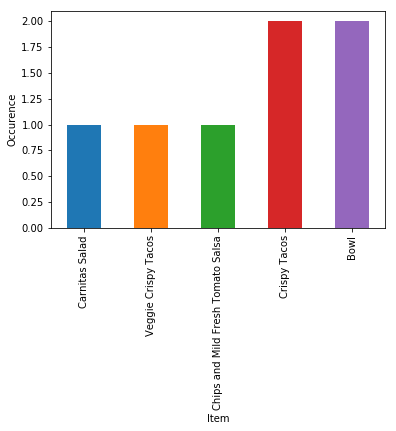

In [30]:
s = ds.groupby('item_name').size().sort_values()[0:5]
ax = s.plot.bar(x = 'item_name') 
plt.ylabel('Occurence')
plt.xlabel('Item')
plt.show()

### Sort the dataset by the name of the item

In [33]:
df.sort_values(by=['item_name'])

order_id  quantity          item_name  \
3389      1360         2  6 Pack Soft Drink   
341        148         1  6 Pack Soft Drink   
1849       749         1  6 Pack Soft Drink   
1860       754         1  6 Pack Soft Drink   
2713      1076         1  6 Pack Soft Drink   
3422      1373         1  6 Pack Soft Drink   
553        230         1  6 Pack Soft Drink   
1916       774         1  6 Pack Soft Drink   
1922       776         1  6 Pack Soft Drink   
1937       784         1  6 Pack Soft Drink   
3836      1537         1  6 Pack Soft Drink   
298        129         1  6 Pack Soft Drink   
1976       798         1  6 Pack Soft Drink   
1167       481         1  6 Pack Soft Drink   
3875      1554         1  6 Pack Soft Drink   
1124       465         1  6 Pack Soft Drink   
3886      1558         1  6 Pack Soft Drink   
2108       849         1  6 Pack Soft Drink   
3010      1196         1  6 Pack Soft Drink   
4535      1803         1  6 Pack Soft Drink   
4169      1664         1  6 Pack Soft Drink   
4174      1666         1  6 Pack Soft Drink   
4527      1800         1  6 Pack Soft Drink   
4522      1798         1  6 Pack Soft Drink   
3806      1525         1  6 Pack Soft Drink   
2389       949         1  6 Pack Soft Drink   
3132      1248         1  6 Pack Soft Drink   
3141      1253         1  6 Pack Soft Drink   
639        264         1  6 Pack Soft Drink   
1026       422         1  6 Pack Soft Drink   
...        ...       ...                ...   
2996      1192         1       Veggie Salad   
3163      1263         1       Veggie Salad   
4084      1635         1       Veggie Salad   
1694       686         1       Veggie Salad   
2756      1094         1       Veggie Salad   
4201      1677         1  Veggie Salad Bowl   
1884       760         1  Veggie Salad Bowl   
455        195         1  Veggie Salad Bowl   
3223      1289         1  Veggie Salad Bowl   
2223       896         1  Veggie Salad Bowl   
2269       913         1  Veggie Salad Bowl   
4541      1805         1  Veggie Salad Bowl   
3293      1321         1  Veggie Salad Bowl   
186         83         1  Veggie Salad Bowl   
960        394         1  Veggie Salad Bowl   
1316       536         1  Veggie Salad Bowl   
2156       869         1  Veggie Salad Bowl   
4261      1700         1  Veggie Salad Bowl   
295        128         1  Veggie Salad Bowl   
4573      1818         1  Veggie Salad Bowl   
2683      1066         1  Veggie Salad Bowl   
496        207         1  Veggie Salad Bowl   
4109      1646         1  Veggie Salad Bowl   
738        304         1  Veggie Soft Tacos   
3889      1559         2  Veggie Soft Tacos   
2384       948         1  Veggie Soft Tacos   
781        322         1  Veggie Soft Tacos   
2851      1132         1  Veggie Soft Tacos   
1699       688         1  Veggie Soft Tacos   
1395       567         1  Veggie Soft Tacos   

                                     choice_description item_price  
3389                                        [Diet Coke]    $12.98   
341                                         [Diet Coke]     $6.49   
1849                                             [Coke]     $6.49   
1860                                        [Diet Coke]     $6.49   
2713                                             [Coke]     $6.49   
3422                                             [Coke]     $6.49   
553                                         [Diet Coke]     $6.49   
1916                                        [Diet Coke]     $6.49   
1922                                             [Coke]     $6.49   
1937                                        [Diet Coke]     $6.49   
3836                                             [Coke]     $6.49   
298                                            [Sprite]     $6.49   
1976                                        [Diet Coke]     $6.49   
1167                                             [Coke]     $6.49   
3875                                        [Diet Coke] 

### How many times were a Veggie Salad Bowl ordered?

In [39]:
print(np.sum(df.loc[(df.item_name == 'Veggie Salad Bowl')]["quantity"].values))

18


### How many times people orderd more than one Canned Soda? 

In [43]:
print(df.loc[(df.item_name == 'Canned Soda') & (df.quantity > 1)].size)

100


### Create a scatterplot with the number of items orderered per order price

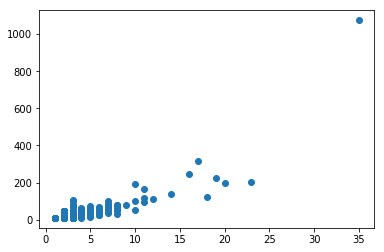

In [49]:
df["revenue"] = df["item_price_clear"]*df["quantity"]
plt.scatter(df.groupby("order_id").sum()["quantity"],df.groupby("order_id").sum()["revenue"])

Submit solution to [https://goo.gl/forms/0iOA8xFJ2o5qONBr2](https://goo.gl/forms/0iOA8xFJ2o5qONBr2)